In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import swifter
import spacy
import ssl
from spacy import displacy
import pandas as pd
from spacy.lang.en import English
from spacy.pipeline import EntityRuler
from sklearn.metrics import accuracy_score
from spacy.matcher import Matcher
from spacy.pipeline import EntityRuler

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from fuzzywuzzy import process, fuzz

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stop=set(stopwords.words('english'))
#nltk.download('stopwords')

from sklearn.linear_model import LogisticRegression

from joblib import Parallel, delayed

from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

import seaborn as sns

import re

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

global cls_acc
cls_acc = 0
global cls_time
cls_time = 0
import time
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from IPython.display import display
from IPython.display import display

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import seaborn as sns

# EDA - Exploratory Data Anaysis
- Importing the original dataset
- Checking the number of rows and columns of the dataset
- Checking the total of null values per columns
- Checking the total of unique values per column

In [2]:
#df = pd.read_parquet('C:/Users/Olimpio.Dasilva/Desktop/MACHINE LEARNING/DATA/reporting_ncr_all_transactions_202302131044.parquet')
df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081506.csv')
#df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081406.csv')
pd.set_option('display.max_colwidth', None)
df = df.sample(10000)
df.head(5)

,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name
256694,DI8082,A379df07a84f73f3b8efd6f7a41be8568,T8e82ad3d4c4a38518c9f1a4c53ab5b92,10.37,USD,Withdrawal Visa Debit,PRET A MANGER 004 NEW YORK NY Date 06/10/22 2 *8226 7 5814 %% Card 13 #0008,NaN,2022-06-11,13365.0,PRET A MANGER,Unknow Payment Agent,NaN,2022-06-14,FTS_CSLK_TRANSAC_20220613_100006.csv,Aloha Pacific Federal Credit Union
1477630,DI3301,A62cd82c56dbc34f1821f66e56798f43b,T673a5d527530337993fc09863f82c3f3,15.00,USD,Withdrawal Signature,WALGREENS #7761 800-289-2273 MO Date 11/22/22 ***45210 5912 %% Card 15 #5865,NaN,2022-11-23,13083.0,WALGREENS,Unknow Payment Agent,NaN,2022-11-25,FTS_CSLK_TRANSAC_20221124_100033.csv,Arsenal Credit Union
1378673,DI3648,A8e10feccbe0b38a78b34688f98e5ff17,Tc4c209c34baf3ac8afa92c93b8732330,36.00,USD,DBT PURCHASE ON 12/29 @ 17:34,COSTCO GAS #0095 TACOMA WA CARD NBR: -6518,NaN,2022-12-30,10725.0,COSTCO,Unknow Payment Agent,NaN,2023-01-02,FTS_CSLK_TRANSAC_20230101_100011.csv,Harborstone Credit Union
208746,DI1000,A34a21cb15a5f39a59752889a48bd6b35,T17bfa083a539349db2b2255bebf50994,18.73,USD,POS PURCHASE,KROGER #0 9155 MANSFIE SHREVEPORT LA,LA,2022-11-28,11646.0,KROGER,Unknow Payment Agent,NaN,2022-12-01,FTS_CSLK_TRANSAC_20221130_100006.csv,VERABANK
1148502,DI3337,A1d52779cf2833f32b7f7a72f46c1c76f,T88fef78a526f3406a44607c86a62872f,49.47,USD,Withdrawal Debit Card,AMZN Mktp US*H08OP3QV2 Amzn.com/bill WA Date 11/03/22 ***45369 5942,NaN,2022-11-03,10127.0,AMAZON.COM,Unknow Payment Agent,NaN,2022-11-06,FTS_CSLK_TRANSAC_20221105_100006.csv,Arizona Federal Credit Union


In [3]:
print('Total number of rows and columns:', df.shape)

Total number of rows and columns: (10000, 16)


In [4]:
print('Total number of null values per column:')
df.isnull().sum()
#df.dropna(inplace=True)

Total number of null values per column:


fi_id                       0
account_id                  0
transaction_id              0
amount                      0
currency                    0
txn_desc1                   0
txn_desc2                 809
region                   8461
transaction_timestamp       0
merchant_id                 0
merchant_name               0
payment_agent               0
payment_agent_id         9523
extract_date                0
filename                    0
name                        0
dtype: int64

In [5]:
print('Total number of unique values per column:')
df.nunique()

Total number of unique values per column:


fi_id                      161
account_id                9182
transaction_id           10000
amount                    5248
currency                     1
txn_desc1                 3584
txn_desc2                 8340
region                      47
transaction_timestamp      504
merchant_id                672
merchant_name              673
payment_agent               14
payment_agent_id            19
extract_date               474
filename                   520
name                       161
dtype: int64

# Unknown Merchant Names
- Selecting dataset with unknown merchants only
- Checking the number of rows and columns

In [6]:
df_unknown_merchs = df.copy(deep=True)
df_unknown_merchs = df_unknown_merchs[df["merchant_name"].str.contains("Unknow Merchant") == True]
print('Total number of rows and columns:', df_unknown_merchs.shape)

Total number of rows and columns: (0, 16)


# Known Merchant Names
- Selecting known merchants only 
- Checking the number of rows/transactions
- Checking the total number of merchants
- Checking the total number of occurrences per merchant
- Concatenated the transaction details columns
- Defined a function for word cloud for top merchants
- Defined a function for N-gram for top merchants with combined names
- Defined a function to check occurence of merchants in transaction columns

In [7]:
# Selecting only known merchants names from the original dataset
df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)
df_known_merchs = df_known_merchs[df["merchant_name"].str.contains("Unknow Merchant") == False]
#######
df_known_merchs_cp2 = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)
df_known_merchs_cp2 = df_known_merchs_cp2[df["merchant_name"].str.contains("Unknow Merchant") == False]

#df_known_merchs = df_known_merchs.head(50)

In [8]:
print('Number of transactions with known merchant names:\n',len(df_known_merchs) )

Number of transactions with known merchant names:
 10000


In [9]:
print('Total number of known merchants:\n',len(df_known_merchs.merchant_name.unique()))

Total number of known merchants:
 673


In [10]:
print('Total number of occurences per merchant name:\n',(df_known_merchs.merchant_name).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name:
 AMAZON.COM                 8.3%
WALMART                    6.9%
MCDONALD'S                 3.2%
APPLE STORE                3.1%
TARGET                     2.4%
                           ... 
MERRELL                    0.0%
VILLAGE INN                0.0%
SHOPPERS FOOD WAREHOUSE    0.0%
BEN & JERRY'S              0.0%
CHOPT                      0.0%
Name: merchant_name, Length: 673, dtype: object


In [11]:
# Concatenating transaction descriptions columns
df_known_merchs["TRANSACTION_DETAILS"] = df_known_merchs['txn_desc1'].astype(str) +" %%%%% "+ df_known_merchs['txn_desc2'].astype(str)

In [12]:
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,TRANSACTION_DETAILS
256694,T8e82ad3d4c4a38518c9f1a4c53ab5b92,Withdrawal Visa Debit,PRET A MANGER 004 NEW YORK NY Date 06/10/22 2 *8226 7 5814 %% Card 13 #0008,Unknow Payment Agent,PRET A MANGER,Withdrawal Visa Debit %%%%% PRET A MANGER 004 NEW YORK NY Date 06/10/22 2 *8226 7 5814 %% Card 13 #0008
1477630,T673a5d527530337993fc09863f82c3f3,Withdrawal Signature,WALGREENS #7761 800-289-2273 MO Date 11/22/22 ***45210 5912 %% Card 15 #5865,Unknow Payment Agent,WALGREENS,Withdrawal Signature %%%%% WALGREENS #7761 800-289-2273 MO Date 11/22/22 ***45210 5912 %% Card 15 #5865
1378673,Tc4c209c34baf3ac8afa92c93b8732330,DBT PURCHASE ON 12/29 @ 17:34,COSTCO GAS #0095 TACOMA WA CARD NBR: -6518,Unknow Payment Agent,COSTCO,DBT PURCHASE ON 12/29 @ 17:34 %%%%% COSTCO GAS #0095 TACOMA WA CARD NBR: -6518
208746,T17bfa083a539349db2b2255bebf50994,POS PURCHASE,KROGER #0 9155 MANSFIE SHREVEPORT LA,Unknow Payment Agent,KROGER,POS PURCHASE %%%%% KROGER #0 9155 MANSFIE SHREVEPORT LA
1148502,T88fef78a526f3406a44607c86a62872f,Withdrawal Debit Card,AMZN Mktp US*H08OP3QV2 Amzn.com/bill WA Date 11/03/22 ***45369 5942,Unknow Payment Agent,AMAZON.COM,Withdrawal Debit Card %%%%% AMZN Mktp US*H08OP3QV2 Amzn.com/bill WA Date 11/03/22 ***45369 5942


In [13]:
def word_cloud(a):
    # Word cloud for more frequent merchant names
    text = " ".join(i for i in a)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(7,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

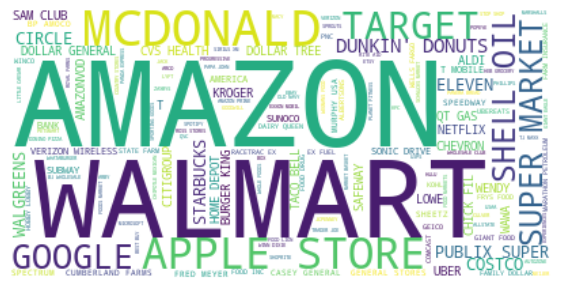

In [14]:
# Copy of the afs merchant names column
df_known_merchs['AFS_PAYMENT_AGENTS'] = df_known_merchs['payment_agent'] 
# Copy of the afs merchant names column
df_known_merchs['AFS_MECHANT_NAMES'] = df_known_merchs['merchant_name']
# Droping original cols
df_known_merchs = df_known_merchs.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1)

# Word cloud for more frequent merchant names
word_cloud(df_known_merchs.AFS_MECHANT_NAMES)

In [15]:
df_known_merchs

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES
256694,T8e82ad3d4c4a38518c9f1a4c53ab5b92,Withdrawal Visa Debit %%%%% PRET A MANGER 004 NEW YORK NY Date 06/10/22 2 *8226 7 5814 %% Card 13 #0008,Unknow Payment Agent,PRET A MANGER
1477630,T673a5d527530337993fc09863f82c3f3,Withdrawal Signature %%%%% WALGREENS #7761 800-289-2273 MO Date 11/22/22 ***45210 5912 %% Card 15 #5865,Unknow Payment Agent,WALGREENS
1378673,Tc4c209c34baf3ac8afa92c93b8732330,DBT PURCHASE ON 12/29 @ 17:34 %%%%% COSTCO GAS #0095 TACOMA WA CARD NBR: -6518,Unknow Payment Agent,COSTCO
208746,T17bfa083a539349db2b2255bebf50994,POS PURCHASE %%%%% KROGER #0 9155 MANSFIE SHREVEPORT LA,Unknow Payment Agent,KROGER
1148502,T88fef78a526f3406a44607c86a62872f,Withdrawal Debit Card %%%%% AMZN Mktp US*H08OP3QV2 Amzn.com/bill WA Date 11/03/22 ***45369 5942,Unknow Payment Agent,AMAZON.COM
...,...,...,...,...
1314459,T503cd77cf7463854af6d0254a8c30c19,Withdrawal #* %%%%% CIRCLE K # 03593 7415 BAYTOWN TX,Unknow Payment Agent,CIRCLE K
131150,Tc1f6786c7cf63299bb4cc91bf4dff0b6,Withdrawal POS %%%%% AMAZON.COM*1M8X78H82 SEATTLE WA,Unknow Payment Agent,AMAZON.COM
1109103,T9eb9e2eb5f6d3298a166f2fb90cf62f8,Card purchase %%%%% DOLLARTREE 5331 (2022-07-28) ROEBLING NJ *99,Unknow Payment Agent,DOLLAR TREE
1444342,T78fca7b82a163f06aab3c528ca19e35f,POS Withdrawal WHOLEFDS BLT %%%%% #10298BASALT COUS,Unknow Payment Agent,WHOLE FOODS MARKET


In [16]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

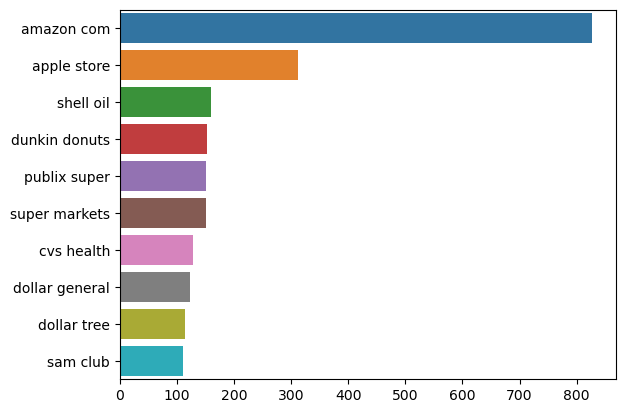

In [17]:
top_n_bigrams=get_top_ngram(df_known_merchs['AFS_MECHANT_NAMES'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x);

In [18]:
def check_names(merchant, t_details):
    
    # Variations for merchant name column
    merchant_1 = merchant
    merchant_2 = merchant_1.lower()
    merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
    merchant_4 = re.sub(' ', '', merchant_2)
    merchant_5 = re.sub('[.com/%]', ' ', merchant_2)
    merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split() + merchant.split()
    
    # Variations for transaction details column
    t_details_1 = t_details
    t_details_2 = t_details.lower()
    t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
    t_details_4 = re.sub("[.com/%]", " ",t_details_2)
    t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
    date_pattern = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", t_details_2)
    
    # Merchants mentioned in transaction description w/ variations
    comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
    comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
    comp_3 = re.sub("WM", "WALMART",t_details_1)
    
    #################################
    
    #################################
    
    # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
    details_lis = t_details_2.split()
    details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + details_lis + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split() + t_details.split() + date_pattern.split()
    
    # Conditions to check if words are in transaction strings
    if (merchant in t_details_3 or t_details_3 in merchant or           #VEEEEEERRRR  merchant in t_details_3 or t_details_3 in merchant or 
        (merchant_2 in t_details_3 or t_details_3 in merchant_2) or 
        (merchant_3 in t_details_3 or t_details_3 in merchant_3) or
        (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
        (merchant_1 in t_details_3 or t_details_1 in merchant_4) or
        (merchant_1 in details_lis_1 or merchant_4 in details_lis)or
        (any(item in merch_list for item in details_lis_1)) or
        (merchant_1[:4] in t_details_1)):
        return True
    else:
        return False
    

- Checked the occurrence of merchants in the first and secod transation colums separately
- Checked the total number of occurrences per column

In [19]:
# Merchants in the txt_1 or txt_2 columns
df_known_merchs_cp2['txn_desc2'] = df_known_merchs_cp2['txn_desc2'].astype(str)
df_known_merchs_cp2['txn_desc1'] = df_known_merchs_cp2['txn_desc1'].astype(str)
df_known_merchs_cp2['merchant_name'] = df_known_merchs_cp2['merchant_name'].astype(str)
df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc1), axis=1) # OR txn_desc2
df_known_merchs_cp2.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,CHECK_MERCH_TRA_cp
256694,T8e82ad3d4c4a38518c9f1a4c53ab5b92,Withdrawal Visa Debit,PRET A MANGER 004 NEW YORK NY Date 06/10/22 2 *8226 7 5814 %% Card 13 #0008,Unknow Payment Agent,PRET A MANGER,False
1477630,T673a5d527530337993fc09863f82c3f3,Withdrawal Signature,WALGREENS #7761 800-289-2273 MO Date 11/22/22 ***45210 5912 %% Card 15 #5865,Unknow Payment Agent,WALGREENS,False
1378673,Tc4c209c34baf3ac8afa92c93b8732330,DBT PURCHASE ON 12/29 @ 17:34,COSTCO GAS #0095 TACOMA WA CARD NBR: -6518,Unknow Payment Agent,COSTCO,False
208746,T17bfa083a539349db2b2255bebf50994,POS PURCHASE,KROGER #0 9155 MANSFIE SHREVEPORT LA,Unknow Payment Agent,KROGER,False
1148502,T88fef78a526f3406a44607c86a62872f,Withdrawal Debit Card,AMZN Mktp US*H08OP3QV2 Amzn.com/bill WA Date 11/03/22 ***45369 5942,Unknow Payment Agent,AMAZON.COM,False


In [20]:
print('Total of transactions with known merchants:\n',len(df_known_merchs_cp2))

Total of transactions with known merchants:
 10000


In [21]:
print('Merchant name occurrence in txn_desc1 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

Merchant name occurrence in txn_desc1 column:
 4202


In [22]:
df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc2), axis=1)
print('Merchant name occurrence in txn_desc2 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

Merchant name occurrence in txn_desc2 column:
 7054


- Checked occurrence of merchants in concatenated transaction column
- Created CHECK_MERCH_TRA to inspect occurrences
- Checked total number of occurences in merchant details coolumn

In [23]:
# Checking if merchant names are mentioned in the transaction description
df_known_merchs['CHECK_MERCH_TRA'] = df_known_merchs.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.TRANSACTION_DETAILS), axis=1)
df_known_merchs.head(5)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
256694,T8e82ad3d4c4a38518c9f1a4c53ab5b92,Withdrawal Visa Debit %%%%% PRET A MANGER 004 NEW YORK NY Date 06/10/22 2 *8226 7 5814 %% Card 13 #0008,Unknow Payment Agent,PRET A MANGER,True
1477630,T673a5d527530337993fc09863f82c3f3,Withdrawal Signature %%%%% WALGREENS #7761 800-289-2273 MO Date 11/22/22 ***45210 5912 %% Card 15 #5865,Unknow Payment Agent,WALGREENS,True
1378673,Tc4c209c34baf3ac8afa92c93b8732330,DBT PURCHASE ON 12/29 @ 17:34 %%%%% COSTCO GAS #0095 TACOMA WA CARD NBR: -6518,Unknow Payment Agent,COSTCO,True
208746,T17bfa083a539349db2b2255bebf50994,POS PURCHASE %%%%% KROGER #0 9155 MANSFIE SHREVEPORT LA,Unknow Payment Agent,KROGER,True
1148502,T88fef78a526f3406a44607c86a62872f,Withdrawal Debit Card %%%%% AMZN Mktp US*H08OP3QV2 Amzn.com/bill WA Date 11/03/22 ***45369 5942,Unknow Payment Agent,AMAZON.COM,True


In [24]:
# Merchant name in the transaction description
print('Merchant name in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == True).sum() )

Merchant name in the transaction description:
 9895


- Created a copy to encode CHECK_MERCH_TRA results
- Created a chart to compare the results
- Created a word cloud of AFS_MECHANT_NAMES to get most frequen merchants
- Checked how many times merchants are mentioned in transaction details
- Checked how many times merchants are not in transaction details
- Created word cloud for merchants not in transaction details 

In [25]:
df_known_merchs_cp = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_PAYMENT_AGENTS','AFS_MECHANT_NAMES','CHECK_MERCH_TRA']].copy(deep=True)
df_known_merchs_cp.head()

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
256694,T8e82ad3d4c4a38518c9f1a4c53ab5b92,Withdrawal Visa Debit %%%%% PRET A MANGER 004 NEW YORK NY Date 06/10/22 2 *8226 7 5814 %% Card 13 #0008,Unknow Payment Agent,PRET A MANGER,True
1477630,T673a5d527530337993fc09863f82c3f3,Withdrawal Signature %%%%% WALGREENS #7761 800-289-2273 MO Date 11/22/22 ***45210 5912 %% Card 15 #5865,Unknow Payment Agent,WALGREENS,True
1378673,Tc4c209c34baf3ac8afa92c93b8732330,DBT PURCHASE ON 12/29 @ 17:34 %%%%% COSTCO GAS #0095 TACOMA WA CARD NBR: -6518,Unknow Payment Agent,COSTCO,True
208746,T17bfa083a539349db2b2255bebf50994,POS PURCHASE %%%%% KROGER #0 9155 MANSFIE SHREVEPORT LA,Unknow Payment Agent,KROGER,True
1148502,T88fef78a526f3406a44607c86a62872f,Withdrawal Debit Card %%%%% AMZN Mktp US*H08OP3QV2 Amzn.com/bill WA Date 11/03/22 ***45369 5942,Unknow Payment Agent,AMAZON.COM,True


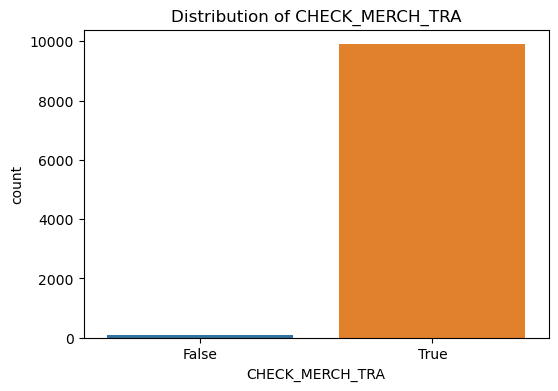

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x="CHECK_MERCH_TRA", data=df_known_merchs_cp)
plt.title("Distribution of CHECK_MERCH_TRA");

In [27]:
print('Percentage of merchant names in T details or not (1/0):\n',(df_known_merchs_cp.CHECK_MERCH_TRA).value_counts(normalize=True).mul(100).round(1).astype(str) + '%');

Percentage of merchant names in T details or not (1/0):
 True     99.0%
False     1.0%
Name: CHECK_MERCH_TRA, dtype: object


In [28]:
# Number of merchant names in transaction details
df_check_true = pd.DataFrame()
df_check_true = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == True]
print('Number of merchant names in transaction details:\n',len(df_check_true))

Number of merchant names in transaction details:
 9895


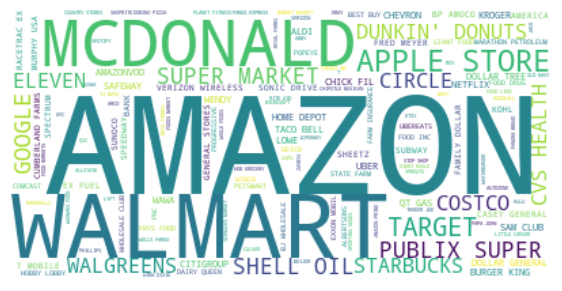

In [29]:
# Word cloud for more frequent merchant names WHEN merchant name is in transaction description

word_cloud(df_check_true.AFS_MECHANT_NAMES)

In [30]:
print('Total number of occurences per merchant name:\n',(df_check_true.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name:
 AMAZON.COM                 8.3%
WALMART                    7.0%
MCDONALD'S                 3.2%
APPLE STORE                3.2%
TARGET                     2.4%
                           ... 
MERRELL                    0.0%
VILLAGE INN                0.0%
SHOPPERS FOOD WAREHOUSE    0.0%
BEN & JERRY'S              0.0%
CHOPT                      0.0%
Name: AFS_MECHANT_NAMES, Length: 670, dtype: object


In [31]:
print('Number of merchant names NOT in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == False).sum())

Number of merchant names NOT in the transaction description:
 105


In [32]:
# Number of merchant names not in transaction details
df_check_false = pd.DataFrame()
df_check_false = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == False]
#print('Number of merchant names NOT in the transaction description:\n', len(df_check_false))

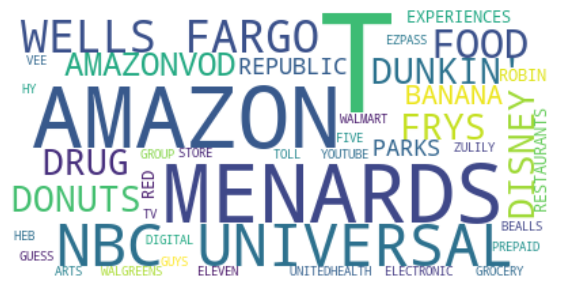

In [33]:
# Word cloud for more frequent merchant names WHEN merchant name is NOT in transaction description
word_cloud(df_check_false.AFS_MECHANT_NAMES)

In [34]:
print('Total number of occurences per merchant name WHEN merchant name is NOT in transation details:\n', (df_check_false.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name WHEN merchant name is NOT in transation details:
 AT&T                            41.0%
AMAZON.COM                       9.5%
NBC UNIVERSAL                    8.6%
MENARDS                          8.6%
WELLS FARGO                      4.8%
FRYS FOOD & DRUG                 2.9%
DUNKIN' DONUTS                   2.9%
AMAZONVOD                        2.9%
RED ROBIN RESTAURANTS            1.9%
DISNEY PARKS AND EXPERIENCES     1.9%
BANANA REPUBLIC                  1.9%
UNITEDHEALTH GROUP               1.0%
EZPASS PREPAID TOLL              1.0%
BEALLS                           1.0%
GUESS?                           1.0%
FIVE GUYS                        1.0%
ZULILY                           1.0%
7 ELEVEN                         1.0%
ELECTRONIC ARTS - DIGITAL        1.0%
WALMART                          1.0%
WALGREENS                        1.0%
YOUTUBE TV                       1.0%
HY-VEE-FOODS                     1.0%
HEB GROCERY                    

- Merchant names not mentioned in transaction description

In [35]:
# Merchant names not mentioned in transaction description
df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA']==False] 


,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
1467818,Td93668c8b21236649ff0674b1eaf65ba,Withdrawal Instant Issue %%%%% ATT* BILL PAYMENT 800-331-0500 TX Date 07/29/22 0 *5828 8 4814 %% Card 10 #0950,Unknow Payment Agent,AT&T,False
740263,T46ea40ea0ef23f0ba2bc417f13978f10,DBT PURCHASE ON 01/06 @ 03:41 %%%%% ATT* BILL PAYM ATT* BILL PAYMENT 800-331-0500 TX CARD NBR: -3146,Unknow Payment Agent,AT&T,False
1111727,Tc57a3d5987de39b8b84333a5d4778940,Card purchase %%%%% PAYPAL *PEACOCKTVLL 4899 (2022-06-27) 402-935-7733 NY *00,PAYPAL,NBC UNIVERSAL,False
58180,Tbc1804df13b3340da3f6f02c758db144,Withdrawal Debit Kindle %%%%% Unltd*1U8VK7VT1 866-321-8851 WAUS,Unknow Payment Agent,AMAZON.COM,False
921800,Td0f9fabad472373bbc7d6ae1879bb72c,Withdrawal Debit Card %%%%% FRY S #5665 520-572-6040 AZ Date 07/20/22 ***07448 5411,Unknow Payment Agent,FRYS FOOD & DRUG,False
...,...,...,...,...,...
100348,T68db90d437593764840da62533f7e211,TX PORT ARTHUR H E B #589 USH E %%%%% Withdrawal @ TX PORT ARTHUR H E B #589 USH E B #589 Trace #22955 (eff. date 03/02/2023),Unknow Payment Agent,HEB GROCERY,False
310309,T8c841f8bb3a7350ba0c626c6234cbd65,DEBIT CARD DEBIT %%%%% 02-23-2023 Peacock 2B78A Pr 212-*8 NY *,Unknow Payment Agent,NBC UNIVERSAL,False
259093,T7b1348da37f038ee99c75ef6ccb82bfa,DBT CRD 1655 08/07/22 *77 ATT*BILL PAYMENT 800-288-2020TX %%%%% nan,Unknow Payment Agent,AT&T,False
712146,T8485e72e3e473a5aac4361794bece5dc,Point Of Sale Withdrawal %%%%% MNRD-OWEN 3001 HEARTLA OWENSBORO KYUS,Unknow Payment Agent,MENARDS,False


# Named Entity Recognition
- Created a copy of df_known_merchs for predictions purposes - "df_known_merchs_pred"
- Created the PREDICTIONS column
- Used NER from Spacy
- Applied Entity Ruler to add all the merchants (PATTERNS) from AFS into the model
- Defined function to find patterns from AFS predictions - "def_patterns"
- Defined function to find the organisations in the Transaction details column - "find_org"
- Defined funtion to implement parallel processing = "find_org_parallel"
- Implemented cust NER model and displayed the results

In [36]:
df_known_merchs_pred = df_known_merchs.copy(deep=True)
df_known_merchs_pred['AFS_MECHANT_NAMES'] = df_known_merchs_pred['AFS_MECHANT_NAMES'].str.lower()
df_known_merchs_pred['TRANSACTION_DETAILS']= df_known_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [37]:
df_known_merchs_pred.head(10)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
256694,T8e82ad3d4c4a38518c9f1a4c53ab5b92,withdrawal visa debit %%%%% pret a manger 004 new york ny date 06/10/22 2 8226 7 5814 %% card 13 0008,Unknow Payment Agent,pret a manger,True
1477630,T673a5d527530337993fc09863f82c3f3,withdrawal signature %%%%% walgreens 7761 800-289-2273 mo date 11/22/22 45210 5912 %% card 15 5865,Unknow Payment Agent,walgreens,True
1378673,Tc4c209c34baf3ac8afa92c93b8732330,dbt purchase on 12/29 17:34 %%%%% costco gas 0095 tacoma wa card nbr: -6518,Unknow Payment Agent,costco,True
208746,T17bfa083a539349db2b2255bebf50994,pos purchase %%%%% kroger 0 9155 mansfie shreveport la,Unknow Payment Agent,kroger,True
1148502,T88fef78a526f3406a44607c86a62872f,withdrawal debit card %%%%% amzn mktp us h08op3qv2 amzn.com/bill wa date 11/03/22 45369 5942,Unknow Payment Agent,amazon.com,True
1445552,Tb82acadffe6b36458c0ccb4d17f4dd87,ach withdrawal %%%%% best buy - payment,Unknow Payment Agent,best buy,True
514194,T7365bc7135a73fada647943c74e1e4db,bp 7giant kettering %%%%% ohus : pos transaction ref: 79171 pur date: 27,Unknow Payment Agent,bp amoco,True
15986,T82f65de72a53309b8f1ad314460fb6fb,joann stores jo 888-739-4120 %%%%% nan,Unknow Payment Agent,joann fabric,True
696394,T7e9631bebbf23c429bb1ee1edf76179a,external withdrawal citi card %%%%% online - payment,Unknow Payment Agent,citigroup,True
689066,Ta6736ac32ae530a08f8bf6df0e71c621,dollar tree 203 highway 70 %%%%% withdrawal dollar tree 203 highway 70 ruidoso nmus trace 42952 (eff. date 09/16/2022),Unknow Payment Agent,dollar tree,True


- Function to find and create a list of patterns

In [38]:
def def_patterns(a):

    #Creating a list of patterns - with all the merchant names (with and without spaces, quotes, .com, etc.)

    org =  a #df_known_payment_agents['AFS_MECHANT_NAMES']

    #List of Entities and Patterns
    org_list = org.tolist()

    a = [ x.strip() for x in org_list] # list comprehension - all merchant names from original org_list
    a_space =list(filter(lambda x: ' ' in x, a)) # filtering all names w spaces
    a_nospace = [x.replace(' ', '') for x in a_space] # replacing spaces w ''

    a_quo =list(filter(lambda x: "'" in x, a)) # filtering all names w quotes
    a_noquuo = [x.replace("'", '') for x in a_quo] # replacing quotes w ''

    a_com =list(filter(lambda x: '.com' in x, a)) # filtering all names w .com
    a_nocom = [x.replace('.com', '') for x in a_com] # replacing .com w ''

    a_dash =list(filter(lambda x: '-' in x, a)) # filtering all names w dash
    a_nodash = [x.replace('-', '') for x in a_com] # replacing dash w ''

    new_lis = a + a_nospace + a_nocom + a_noquuo + a_nodash # add instead of dis_list


    # Creating a list of patterns with all the variations from new_lis
    patterns = []
    i = 0
    new_lis = tuple(new_lis)
    for item in new_lis:
        patterns.append({"label": 'ORG', "pattern": [{"LOWER":item}]})
        # patterns.append({"label": 'ORG', "pattern": new_lis[i]})
        i+=1

    # #print(patterns)
    #patterns.append(listb)
    #print(patterns)


    return patterns

In [39]:
patterns = def_patterns(df_known_merchs_pred['AFS_MECHANT_NAMES'])

- Function to find organisations using patterns

In [40]:
# Function to find merchant names in a string - using an NER model with the previously created patterns

def find_org(text:str):
    
    #Build upon the spaCy Model
    NER2 = spacy.load("en_core_web_sm")
    
    #Create the EntityRuler
    ruler = NER2.add_pipe("entity_ruler", config={'validate': True})
     
    ruler.add_patterns(patterns)
    doc_ner = NER2(text)
    
    # useless strings
    junk = ['fip', 'ca(2810','fis','xx4386', '#185','*','hr0d','k50ms3hv','xx9510','xx4710','xx4706','xx0322','he34i8pz0','xx3840','pd1387','ma(9661','ns4qa9xb3 ']
    
    #extract entities
    orgs = []
    for ent in doc_ner.ents:
        if ((ent.label_ == "ORG") and (ent.text not in junk)):
            orgs.append(ent.text)
    orgs = list(set(orgs))
    return ' '.join(orgs) if orgs else 'NA'

- Function for parallel processing

In [41]:
def find_org_parallel(a:dict):
    i=a.copy()
    print(i)
    result = find_org(i['TRANSACTION_DETAILS'])
    i['PREDICTIONS']= result
    print(i)
    return i

In [42]:
df_known_merchs_pred.head(5)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
256694,T8e82ad3d4c4a38518c9f1a4c53ab5b92,withdrawal visa debit %%%%% pret a manger 004 new york ny date 06/10/22 2 8226 7 5814 %% card 13 0008,Unknow Payment Agent,pret a manger,True
1477630,T673a5d527530337993fc09863f82c3f3,withdrawal signature %%%%% walgreens 7761 800-289-2273 mo date 11/22/22 45210 5912 %% card 15 5865,Unknow Payment Agent,walgreens,True
1378673,Tc4c209c34baf3ac8afa92c93b8732330,dbt purchase on 12/29 17:34 %%%%% costco gas 0095 tacoma wa card nbr: -6518,Unknow Payment Agent,costco,True
208746,T17bfa083a539349db2b2255bebf50994,pos purchase %%%%% kroger 0 9155 mansfie shreveport la,Unknow Payment Agent,kroger,True
1148502,T88fef78a526f3406a44607c86a62872f,withdrawal debit card %%%%% amzn mktp us h08op3qv2 amzn.com/bill wa date 11/03/22 45369 5942,Unknow Payment Agent,amazon.com,True


In [43]:
t_list = df_known_merchs_pred[['transaction_id', 'TRANSACTION_DETAILS', 'AFS_MECHANT_NAMES', 'CHECK_MERCH_TRA']].copy(deep=True).to_dict(orient='records') #replace similarity w unique ID

In [44]:
# df_known_merchs_pred['PREDICTIONS'] = df_known_merchs_pred.TRANSACTION_DETAILS.swifter.apply(find_org)

In [45]:
par = Parallel(n_jobs=-1)(delayed(find_org_parallel)(i) for i in tqdm(t_list))

100%|██████████| 10000/10000 [1:00:05<00:00,  2.77it/s]


In [46]:
df_known_merchs_pred = pd.DataFrame(par)

- Function to compare results - True/False

In [47]:
def check_names_pred(a, b):
    if ((a in b) or (b in a)):
        return True
    elif (fuzz.ratio(a, b) > 92):
        return True
    else:
        return False

- NER predictions using Spacy and Entity Ruler technique

In [48]:
def check_names_pred_2(a, b):
    
    
    # if ((a in b) or (b in a)):
    #     b=a
    #     return b
    
    # Variations for merchant name column
    merchant_1 = a
    merchant_2 = merchant_1.lower()
    merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
    merchant_4 = re.sub(' ', '', merchant_2)
    merchant_5 = re.sub('[.com/]', ' ', merchant_2)
    date_pattern_1 = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", merchant_2)
    merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split() + a.split() + date_pattern_1.split()     #merch_list =  a.split()
    
    # Variations for transaction details column
    t_details_1 = b
    t_details_2 = b.lower()
    t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
    t_details_4 = re.sub("[.com/]", " ",t_details_2)
    t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
    date_pattern = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", t_details_2)
    
    # Merchants mentioned in transaction description w/ variations
    comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
    comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
    comp_3 = re.sub("WM", "WALMART",t_details_1)
   
    
    # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
    #details_lis = t_details_2.split()
    details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split() + b.split() + date_pattern.split()
    #details_lis_1 = b.split() + date_pattern.split()
    
    
    # Conditions to check if words are in transaction strings
    if (a in b or t_details_3 in a or 
        (merchant_2 in t_details_3 or t_details_3 in merchant_2) or
        (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
        (any(item in merch_list for item in details_lis_1)) or
        (any(item in details_lis_1 for item in merch_list)) or
        (merchant_1[:3] in t_details_1)):
        b=a
        return b #True
    elif ((fuzz.ratio(a, b) > 90) or 
          (fuzz.partial_ratio(a , b) > 90) or 
          (fuzz.token_sort_ratio(a,b) > 90)):
        b=a
        return b #True
    else:
        b = 'nothing'
        return b #False
    

In [49]:
df_known_merchs_pred['CHECK_TF'] = df_known_merchs_pred.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.PREDICTIONS), axis=1)
df_known_merchs_pred.sample(10)

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,PREDICTIONS,CHECK_TF
5015,T67e7b4a7141e31f08f8382fd135d803f,withdrawal debit popeyes 918 %%%%% tallahassee flus,popeye's,True,popeyes,True
3131,T6db53c9647bf3be9a70c4fc4ab376433,withdrawal debit card %%%%% amzn mktp us bl6ir80t3 amzn.com/bill wa date 12/11/22 36850 5942 %% card 15 1369,amazon.com,True,NA,False
6459,T9d29c7e33667357d9e5e79b5d60b5fe0,pos transaction %%%%% dollartree 3495 belmont ave youngstown ohus,dollar tree,True,dollartree,True
3291,T86946135390133a8b9052b230ec9bd8b,ext wd amex-macy's affinity %%%%% online - bill paymt,macy's,True,ext wd amex-macy's,True
6384,T74f6f277f65e3c0d8f6c8e631f382706,external withdrawal verizon %%%%% wireless - payments,verizon wireless,True,verizon,True
9019,T60f49439e19b340b8bb041973a2ff5d9,pos debit %%%%% haagen dazs 639 7101 democracy blvd bethesda mdus,haagen dazs,True,haagen,True
4071,T4c0ad5da41aa3e02a990a1d20d36ddb7,dda pur microsoft %%%%% microsoft redmond wa,microsoft,True,dda pur microsoft microsoft,True
2599,T3f34f54ad107384b861e936e6ffc8f07,withdrawal pfcu check card %%%%% pp google mount horse 402-935-7733 ca date 02/19/23 50883 5815 %% card 30 4877,google,True,NA,False
7370,Ta8312ac92bc232bda8e207f1785b6dcb,withdrawal spectrum %%%%% type: spectrum co: spectrum %% ach ecc ppd %% ach trace 862,spectrum,True,spectrum,True
3229,T64952f76ffbf38aeb8075592c815d7c7,ach withdrawal %%%%% comp name: home depot desc: auto pymt,home depot,True,NA,False


In [50]:
(df_known_merchs_pred.CHECK_TF).value_counts()

False    5106
True     4894
Name: CHECK_TF, dtype: int64

In [51]:
df_known_merchs_pred['CHECK_TF_2'] = df_known_merchs_pred.apply(lambda x: check_names_pred_2(x.AFS_MECHANT_NAMES, x.PREDICTIONS), axis=1)
df_known_merchs_pred.sample(10)

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,PREDICTIONS,CHECK_TF,CHECK_TF_2
3482,Tb6cf64a5409f31bba6c48f668052f735,withdrawal citibank %%%%% type: bill paymt co: citibank %% ach ecc ppd %% ach trace 351,citigroup,True,NA,False,nothing
7656,Tf0a8658ce5ae3bb388ef6ef9be4545bf,starbucks store 61113 provo us %%%%% nan,starbucks,True,starbucks,True,starbucks
8677,T160b3bc16fb1330f96366247b393fbf9,withdrawal pos %%%%% nws staples 0614 100 tarentum bridg,staples,True,staples,True,staples
6146,T879d9f49e3aa3e4cbbfa17510f430064,withdrawal debit card %%%%% mcdonald's f31293 laveen az date 02/20/22 76664 5814,mcdonald's,True,mcdonald's,True,mcdonald's
1642,T6b6cea197a31321184d49d632c41c08b,chevron/49 quick stop pos deb 1532 11/18/22 88 yazoo cityms %%%%% nan,chevron,True,NA,False,nothing
3520,Ta6e3d5a19b19341d86314f1191e020e4,love's 718 hope hull %%%%% alus : pos transaction,loves travel & country stores,True,NA,False,nothing
9182,Tfec6d53c5648360ba8e9cbd4aec74d56,wal-mart super 1503 wal-sams %%%%% dayton ohus : pos transaction ref: 41889 pur date: 07,walmart,True,wal-sams wal-mart,True,walmart
7325,Td6cec5ff623f311387db2250a0ec2401,pos purchase progressive in 855-758-0630 oh %%%%% 0,progressive,True,progressive,True,progressive
6537,T46d686b878003d6a95e053d1b8ff6e1e,withdrawal debit publix 2381 %%%%% west state ro longwood flus,publix super markets,True,NA,False,nothing
9436,T2a703a22e3b23867ac7d68cedc467243,withdrawal happier at home %%%%% type: sale id: 6202 co: happier at home name: elyse m rettig %% ach trace 841,at home,True,elyse m,False,nothing


In [52]:
df_known_merchs_pred = df_known_merchs_pred.sample(10000)

In [53]:
predicted_labels = df_known_merchs_pred['CHECK_TF_2']
true_labels = df_known_merchs_pred['AFS_MECHANT_NAMES']
print(metrics.classification_report(true_labels, predicted_labels))

                                    precision    recall  f1-score   support

                     1-800-petmeds       0.00      0.00      0.00         1
                   24 hour fitness       0.00      0.00      0.00         1
                          7 eleven       1.00      0.26      0.42       140
                     99-cents-only       0.00      0.00      0.00         6
                               a&w       0.00      0.00      0.00         1
                     abc fine wine       1.00      1.00      1.00         4
                          abuelo's       1.00      1.00      1.00         1
         academy sports + outdoors       1.00      0.38      0.55         8
                      ace hardware       1.00      0.09      0.17        11
                      acme markets       0.00      0.00      0.00         8
                            adidas       1.00      1.00      1.00         1
                     adobe systems       1.00      0.12      0.22         8
           

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [54]:
(df_known_merchs_pred.CHECK_TF_2).value_counts()

nothing          5106
amazon.com        541
walmart           525
mcdonald's        317
target            208
                 ... 
idt                 1
market street       1
viasat              1
minnetonka          1
milly               1
Name: CHECK_TF_2, Length: 328, dtype: int64

In [55]:
def c_matrix(a_pred, a_test):

    # count the number of occurrences of each predicted label
    value_counts = Counter(a_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # print the top 10 labels by count
    for label in sorted_labels[:10]:
        print(f"{label}: {value_counts[label]}")
    

    # get the indices of the top 10 predicted values
    top_10_labels = sorted_labels[:10]

    # filter the true and predicted labels to only include the top 10 labels
    top_10_true = [label if label in top_10_labels else "Other" for label in a_test]
    top_10_pred = [label if label in top_10_labels else "Other" for label in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(top_10_true, top_10_pred,normalize='true')
    

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=top_10_labels + ["Other"], yticklabels=top_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
    #========================================================================================================================
    
    
    # # sort the labels by ascending order of count
    # sorted_labels2 = sorted(value_counts, key=value_counts.get, reverse=False)

    # # print the 10 least predicted labels by count
    # for label2 in sorted_labels2[:10]:
    #     print(f"{label2}: {value_counts[label2]}")
    

    # # get the indices of the top 10 predicted values
    # least_10_labels = sorted_labels2[:10]

    # # filter the true and predicted labels to only include the top 10 labels
    # least_10_true = [label2 if label2 in least_10_labels else "Other" for label2 in a_test]
    # least_10_pred = [label2 if label2 in least_10_labels else "Other" for label2 in a_pred]

    # # create the confusion matrix
    # cm = confusion_matrix(least_10_true, least_10_pred,normalize='true')

    # # plot the confusion matrix
    # fig, ax = plt.subplots(figsize=(6, 6))
    # sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=least_10_labels + ["Other"], yticklabels=least_10_labels + ["Other"])
    # plt.xlabel("Predicted Label")
    # plt.ylabel("True Label")
    # plt.show()
    
    return

nothing: 5106
amazon.com: 541
walmart: 525
mcdonald's: 317
target: 208
google: 179
costco: 136
starbucks: 127
walgreens: 118
wawa: 106


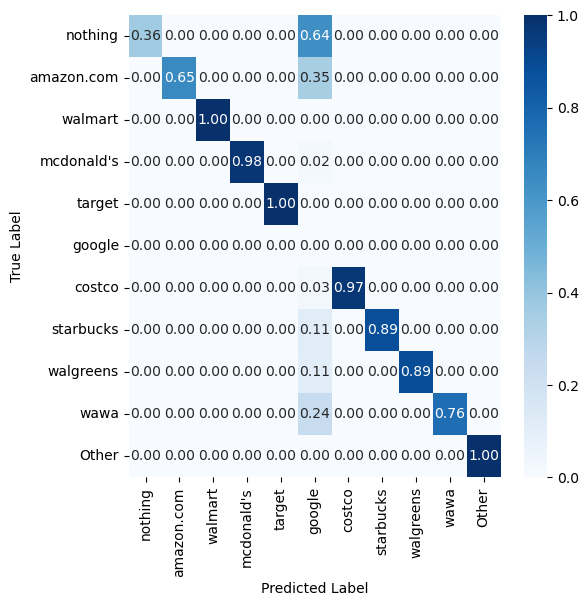

In [56]:
c_matrix(predicted_labels, true_labels)

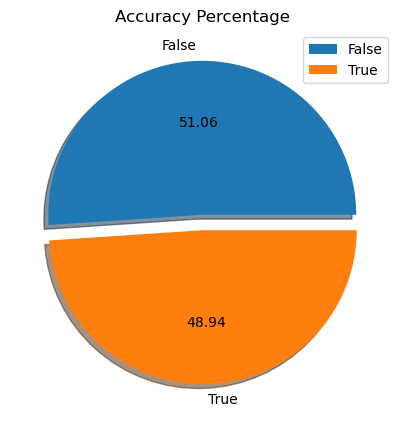

In [57]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df_known_merchs_pred.groupby('CHECK_TF').size().plot(kind='pie', autopct='%.2f', title='Accuracy Percentage', explode=[0.05, 0.05], legend=True, shadow=True)
ax1.set_ylabel('', size=10);


In [58]:
(df_known_merchs_pred.CHECK_TF).value_counts()

False    5106
True     4894
Name: CHECK_TF, dtype: int64

# ML Models - Labelling
- Created different classification models for labelling
    - Multinomial Naive Bayes
    - Linear SVC
    - K-Nearest Neighbors

In [59]:
df_known_class_pred = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_MECHANT_NAMES']].copy(deep=True)
df_known_class_pred['AFS_MECHANT_NAMES'] = df_known_class_pred['AFS_MECHANT_NAMES'].str.lower()
df_known_class_pred['TRANSACTION_DETAILS']= df_known_class_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [60]:
df_known_class_pred.head(10)

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
256694,T8e82ad3d4c4a38518c9f1a4c53ab5b92,withdrawal visa debit %%%%% pret a manger 004 new york ny date 06/10/22 2 8226 7 5814 %% card 13 0008,pret a manger
1477630,T673a5d527530337993fc09863f82c3f3,withdrawal signature %%%%% walgreens 7761 800-289-2273 mo date 11/22/22 45210 5912 %% card 15 5865,walgreens
1378673,Tc4c209c34baf3ac8afa92c93b8732330,dbt purchase on 12/29 17:34 %%%%% costco gas 0095 tacoma wa card nbr: -6518,costco
208746,T17bfa083a539349db2b2255bebf50994,pos purchase %%%%% kroger 0 9155 mansfie shreveport la,kroger
1148502,T88fef78a526f3406a44607c86a62872f,withdrawal debit card %%%%% amzn mktp us h08op3qv2 amzn.com/bill wa date 11/03/22 45369 5942,amazon.com
1445552,Tb82acadffe6b36458c0ccb4d17f4dd87,ach withdrawal %%%%% best buy - payment,best buy
514194,T7365bc7135a73fada647943c74e1e4db,bp 7giant kettering %%%%% ohus : pos transaction ref: 79171 pur date: 27,bp amoco
15986,T82f65de72a53309b8f1ad314460fb6fb,joann stores jo 888-739-4120 %%%%% nan,joann fabric
696394,T7e9631bebbf23c429bb1ee1edf76179a,external withdrawal citi card %%%%% online - payment,citigroup
689066,Ta6736ac32ae530a08f8bf6df0e71c621,dollar tree 203 highway 70 %%%%% withdrawal dollar tree 203 highway 70 ruidoso nmus trace 42952 (eff. date 09/16/2022),dollar tree


In [61]:
def top_hists(t_pred, t_test):
    
    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # get the top 10 labels and their counts
    top_10_labels = sorted_labels[:10]
    top_10_counts = [value_counts[label] for label in top_10_labels]

    # create the horizontal bar plot
    plt.figure(figsize=(6,6))
    sns.barplot(x=top_10_counts, y=top_10_labels, orient='h')
    plt.title('Histogram of Top 10 Labels')
    plt.xlabel('Count')
    plt.ylabel('Label')
    plt.show()
    
    #=========================================================================================
    

    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # get the top 10 predicted labels and their counts
    top_10_labels = sorted_labels[:10]
    top_10_counts = [value_counts[label] for label in top_10_labels]

    # create a horizontal bar plot for the top 10 predicted labels
    plt.figure(figsize=(6,6))
    plt.barh(range(len(top_10_labels)), top_10_counts, align='center')
    plt.yticks(range(len(top_10_labels)), top_10_labels)
    plt.xlabel('Count')
    plt.ylabel('Predicted Label')
    plt.title('Top 10 Predicted Labels')
    plt.show()
    
    #=========================================================================================
    

    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by ascending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=False)

    # get the least 10 predicted labels and their counts
    least_10_labels = sorted_labels[:10]
    least_10_counts = [value_counts[label] for label in least_10_labels]

    # create a horizontal bar plot for the least 10 predicted labels
    plt.figure(figsize=(6,6))
    plt.barh(range(len(least_10_labels)), least_10_counts, align='center')
    plt.yticks(range(len(least_10_labels)), least_10_labels)
    plt.xlabel('Count')
    plt.ylabel('Predicted Label')
    plt.title('Least 10 Predicted Labels')
    plt.show()

    return

In [62]:
def df_description(clss, a_test,a_pred,a_train,b_train,b_test):     
    #(classifier, y_test, y_pred, y_train,X_train,X_test)
    
    print('Accuracy : {0:0.3f}'.format(accuracy_score(a_test, a_pred)))
    
    #========================================================================================================================
    
    
    print('Number of unique merchants in the test set: ', len(a_test.unique()))
    print('Number of unique merchants in the predicted set: ', len(np.unique(a_pred)))
    print('Number of unique merchants in train set: ', len(a_train.unique()))
    print('\nNumber of unique "Transaction Details" rows in test set: ', len(b_train.unique()))
    print('Number of unique "Transaction Details" rows in train set: ', len(b_test.unique()))
    print('\nTotal number of rows in the train set: ', len(b_train))
    print('Total number of rows in the test set', len(b_test))
    
    
    train_acc = accuracy_score(a_train, clss.predict(b_train))
    test_acc = accuracy_score(a_test, a_pred)
    print("Train accuracy:", train_acc)
    print("Test accuracy:", test_acc)
    
    
    #========================================================================================================================
    
    
    # Get the classification report as a string
    report_dict = metrics.classification_report(a_test, a_pred, zero_division=0, output_dict=True)

    # Convert the report dictionary to a pandas dataframe
    report_data = pd.DataFrame(report_dict).transpose()
    
    precision_count = (report_data['precision'] == 1).sum()
    total_categories = report_data.shape[0]
    precision_percentage = precision_count / total_categories * 100
    
    print('\n===================================\n')
    print('Percentage of best precision', precision_percentage)
    
    recall_count = (report_data['recall'] == 1).sum()
    total_categories = report_data.shape[0]
    recall_percentage = recall_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best recall', recall_percentage)
    
    f1score_count = (report_data['f1-score'] == 1).sum()
    total_categories = report_data.shape[0]
    f1score_percentage = f1score_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best f1score', f1score_percentage)
    
    print('===================================\n')
    
    
    top_hists(a_pred, a_test)
    c_matrix(a_pred, a_test)
    
    return
    
    

In [63]:
def c_matrix(a_pred, a_test):

    # count the number of occurrences of each predicted label
    value_counts = Counter(a_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # print the top 10 labels by count
    for label in sorted_labels[:10]:
        print(f"{label}: {value_counts[label]}")
    

    # get the indices of the top 10 predicted values
    top_10_labels = sorted_labels[:10]

    # filter the true and predicted labels to only include the top 10 labels
    top_10_true = [label if label in top_10_labels else "Other" for label in a_test]
    top_10_pred = [label if label in top_10_labels else "Other" for label in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(top_10_true, top_10_pred, normalize='true')

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=top_10_labels + ["Other"], yticklabels=top_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
    #========================================================================================================================
    

    # # sort the labels by ascending order of count
    # sorted_labels2 = sorted(value_counts, key=value_counts.get, reverse=False)

    # # print the 10 least predicted labels by count
    # for label2 in sorted_labels2[:10]:
    #     print(f"{label2}: {value_counts[label2]}")
    

    # # get the indices of the top 10 predicted values
    # least_10_labels = sorted_labels2[:10]

    # # filter the true and predicted labels to only include the top 10 labels
    # least_10_true = [label2 if label2 in least_10_labels else "Other" for label2 in a_test]
    # least_10_pred = [label2 if label2 in least_10_labels else "Other" for label2 in a_pred]

    # # create the confusion matrix
    # cm = confusion_matrix(least_10_true, least_10_pred, normalize='true')

    # # plot the confusion matrix
    # fig, ax = plt.subplots(figsize=(6, 6))
    # sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=least_10_labels + ["Other"], yticklabels=least_10_labels + ["Other"])
    # plt.xlabel("Predicted Label")
    # plt.ylabel("True Label")
    # plt.show()
    
    return

In [64]:
def l_curve(clss, xt, yt):
    #classifier, X_train_oversampled,y_train_oversampled
    
    train_sizes, train_scores, test_scores = learning_curve(
        clss, xt[:, 0], yt, cv=5, scoring='f1_macro', 
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=99
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
    return

In [65]:

def train(classifier, X, y):
    

    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)        
    
    # Random over-sampling due to imbalanced classes
    resampler = RandomOverSampler(random_state=0)
    X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train.to_numpy().reshape(-1, 1), y_train)
    #sns.countplot(x=y_train_oversampled)  
    
    l_curve(classifier, X_train_oversampled, y_train_oversampled)
  
  
    classifier.fit(X_train_oversampled[:, 0], y_train_oversampled)                                                      
    end = time.time()                                                                                
    
    y_pred = classifier.predict(X_test) 
  
  
    df_description(classifier, y_test, y_pred, y_train,X_train,X_test)
    # top_hists(y_pred, y_test)
    # c_matrix(y_pred, y_test)
    
    
    print('\n\n', metrics.classification_report(y_test, y_pred))
    
    return classifier


In [66]:
df_known_class_pred

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
256694,T8e82ad3d4c4a38518c9f1a4c53ab5b92,withdrawal visa debit %%%%% pret a manger 004 new york ny date 06/10/22 2 8226 7 5814 %% card 13 0008,pret a manger
1477630,T673a5d527530337993fc09863f82c3f3,withdrawal signature %%%%% walgreens 7761 800-289-2273 mo date 11/22/22 45210 5912 %% card 15 5865,walgreens
1378673,Tc4c209c34baf3ac8afa92c93b8732330,dbt purchase on 12/29 17:34 %%%%% costco gas 0095 tacoma wa card nbr: -6518,costco
208746,T17bfa083a539349db2b2255bebf50994,pos purchase %%%%% kroger 0 9155 mansfie shreveport la,kroger
1148502,T88fef78a526f3406a44607c86a62872f,withdrawal debit card %%%%% amzn mktp us h08op3qv2 amzn.com/bill wa date 11/03/22 45369 5942,amazon.com
...,...,...,...
1314459,T503cd77cf7463854af6d0254a8c30c19,withdrawal %%%%% circle k 03593 7415 baytown tx,circle k
131150,Tc1f6786c7cf63299bb4cc91bf4dff0b6,withdrawal pos %%%%% amazon.com 1m8x78h82 seattle wa,amazon.com
1109103,T9eb9e2eb5f6d3298a166f2fb90cf62f8,card purchase %%%%% dollartree 5331 (2022-07-28) roebling nj 99,dollar tree
1444342,T78fca7b82a163f06aab3c528ca19e35f,pos withdrawal wholefds blt %%%%% 10298basalt cous,whole foods market


- Multinomial Naive Bayes

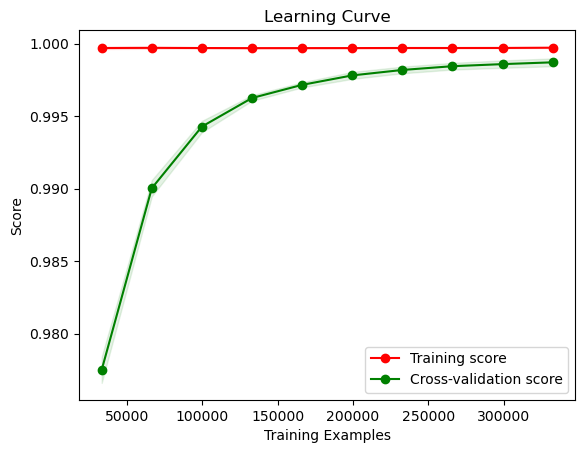

Accuracy : 0.501
Number of unique merchants in the test set:  361
Number of unique merchants in the predicted set:  292
Number of unique merchants in train set:  626

Number of unique "Transaction Details" rows in test set:  7598
Number of unique "Transaction Details" rows in train set:  1973

Total number of rows in the train set:  8000
Total number of rows in the test set 2000
Train accuracy: 0.997625
Test accuracy: 0.5015


Percentage of best precision 16.585365853658537

Percentage of best recall 16.097560975609756

Percentage of best f1score 11.219512195121952



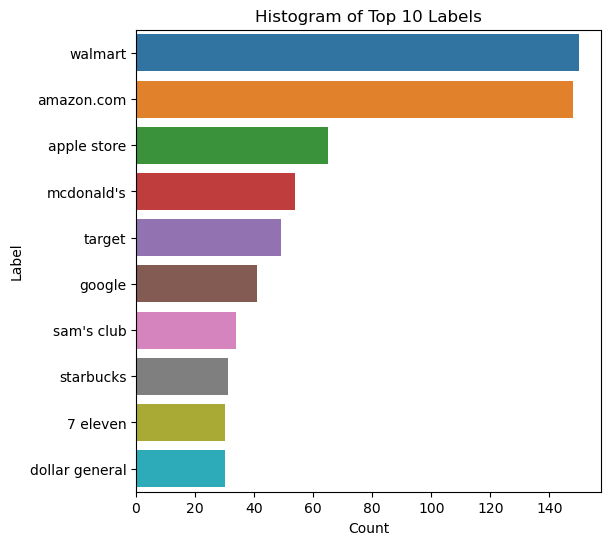

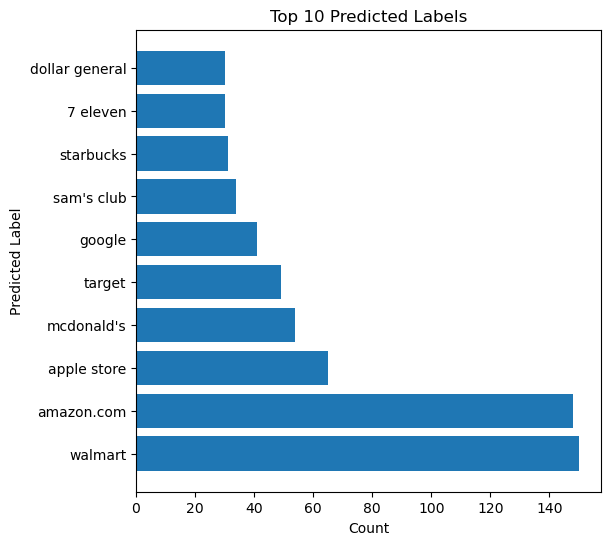

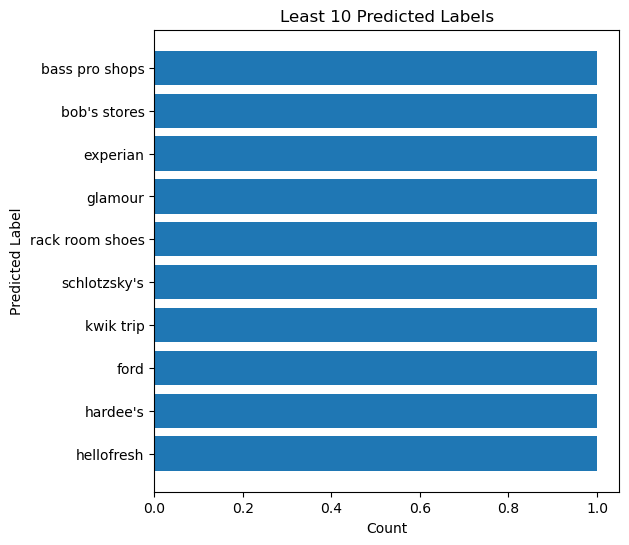

walmart: 150
amazon.com: 148
apple store: 65
mcdonald's: 54
target: 49
google: 41
sam's club: 34
starbucks: 31
7 eleven: 30
dollar general: 30


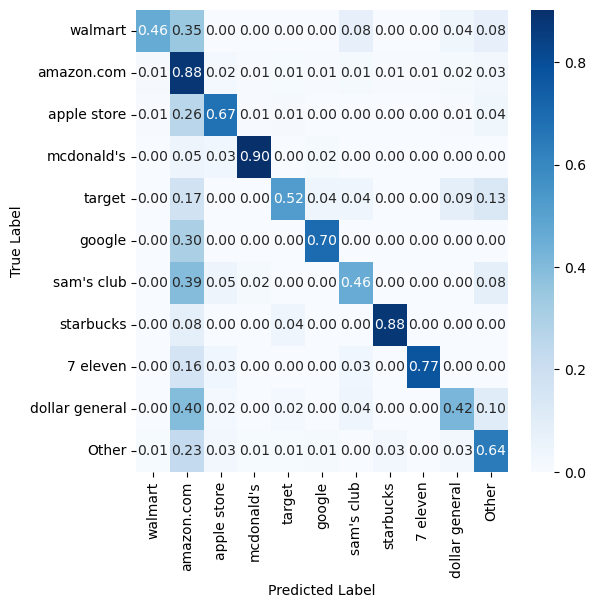



                                     precision    recall  f1-score   support

                          7 eleven       0.40      0.46      0.43        26
                     99-cents-only       0.00      0.00      0.00         1
         academy sports + outdoors       0.00      0.00      0.00         3
                      ace hardware       0.00      0.00      0.00         1
                      acme markets       0.50      0.33      0.40         3
                     adobe systems       0.67      1.00      0.80         2
                        albertsons       0.43      0.33      0.38         9
                              aldi       0.43      0.35      0.39        17
                          allstate       1.00      1.00      1.00         4
                             aloft       1.00      1.00      1.00         1
                      amazon prime       0.26      0.83      0.40         6
                        amazon.com       0.74      0.67      0.71       163
        

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [67]:
from sklearn.preprocessing import StandardScaler
# ss = StandardScaler().fit(df_known_class_pred['TRANSACTION_DETAILS'])
# Xa = ss.transform(df_known_class_pred['TRANSACTION_DETAILS'])

classifier1 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), # 
                        ('scaler', StandardScaler(with_mean=False)),
                        ('classifier', MultinomialNB(alpha=0.005))])

train(classifier1, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])
# train(classifier1, Xa, df_known_class_pred['AFS_MECHANT_NAMES'])

MNB = cls_acc
Mtime = cls_time
# print("\n\nMNB: ", MNB)
# print("Time: ", Mtime)



- Linear SVC

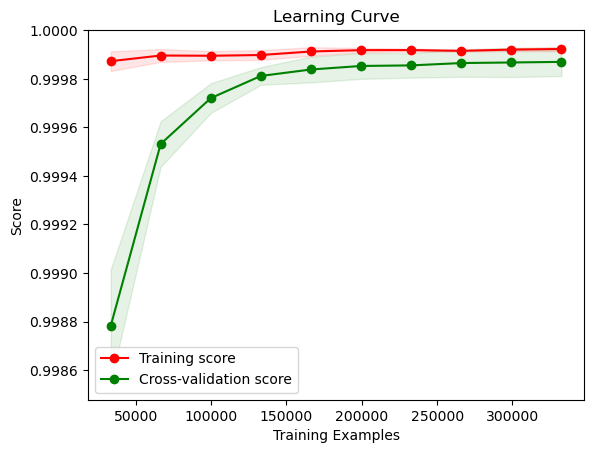

Accuracy : 0.941
Number of unique merchants in the test set:  361
Number of unique merchants in the predicted set:  316
Number of unique merchants in train set:  626

Number of unique "Transaction Details" rows in test set:  7598
Number of unique "Transaction Details" rows in train set:  1973

Total number of rows in the train set:  8000
Total number of rows in the test set 2000
Train accuracy: 0.9995
Test accuracy: 0.9405


Percentage of best precision 60.9375

Percentage of best recall 69.79166666666666

Percentage of best f1score 58.072916666666664



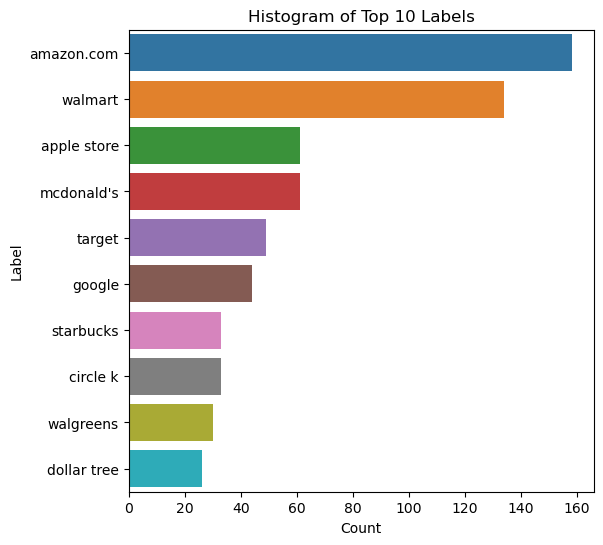

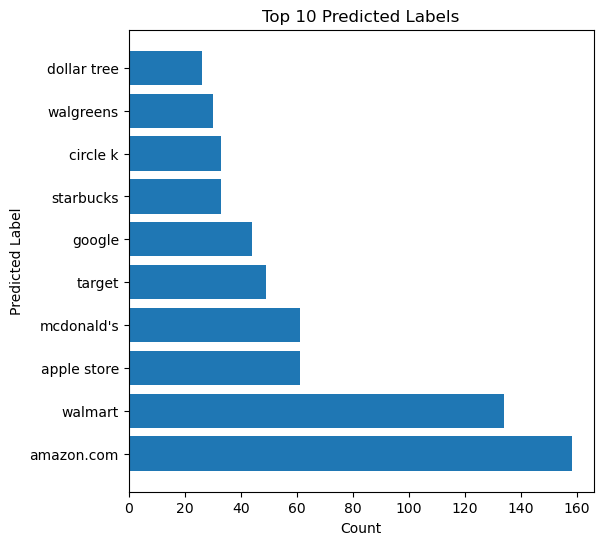

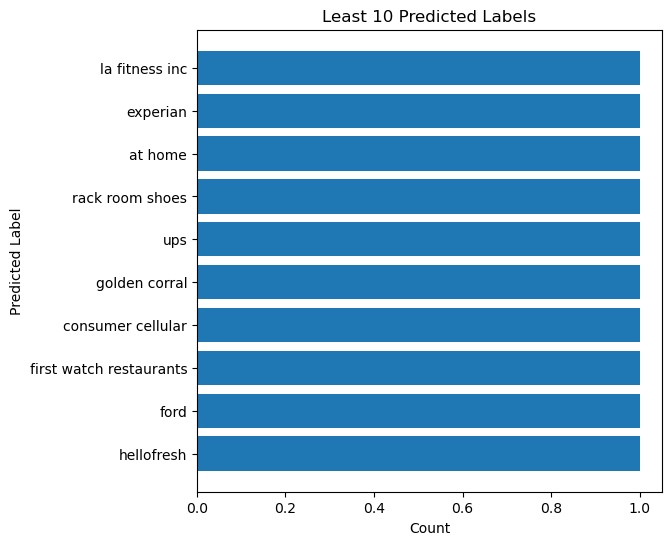

amazon.com: 158
walmart: 134
apple store: 61
mcdonald's: 61
target: 49
google: 44
starbucks: 33
circle k: 33
walgreens: 30
dollar tree: 26


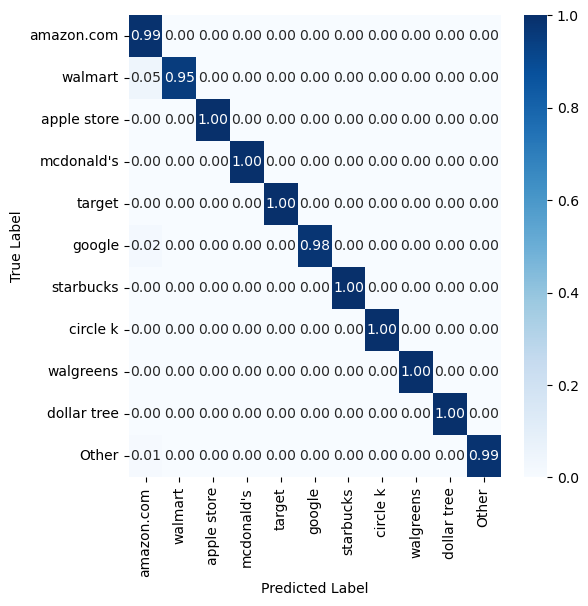



                                     precision    recall  f1-score   support

                          7 eleven       1.00      0.96      0.98        26
                     99-cents-only       1.00      1.00      1.00         1
         academy sports + outdoors       0.75      1.00      0.86         3
                      ace hardware       1.00      1.00      1.00         1
                      acme markets       1.00      1.00      1.00         3
                     adobe systems       1.00      1.00      1.00         2
                advance auto parts       0.00      0.00      0.00         0
                        albertsons       1.00      1.00      1.00         9
                              aldi       0.89      1.00      0.94        17
                          allstate       1.00      1.00      1.00         4
                             aloft       1.00      1.00      1.00         1
                      amazon prime       0.43      1.00      0.60         6
        

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [68]:
from sklearn.svm import LinearSVC

classifier2 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), #('scaler', StandardScaler(with_mean=False)),
                        ('classifier', LinearSVC(C=1.0))])

train(classifier2, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

SVC = cls_acc
Stime = cls_time
# print("\n\nSVC: ", SVC)
# print("Time: ", Stime)


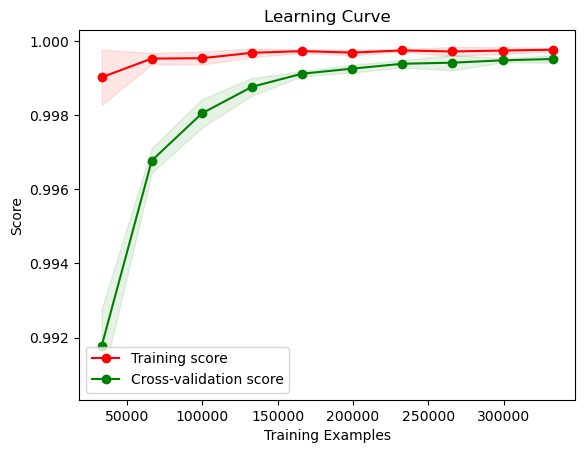

Accuracy : 0.810
Number of unique merchants in the test set:  361
Number of unique merchants in the predicted set:  314
Number of unique merchants in train set:  626

Number of unique "Transaction Details" rows in test set:  7598
Number of unique "Transaction Details" rows in train set:  1973

Total number of rows in the train set:  8000
Total number of rows in the test set 2000
Train accuracy: 0.99825
Test accuracy: 0.81


Percentage of best precision 34.66334164588529

Percentage of best recall 36.15960099750624

Percentage of best f1score 22.942643391521198



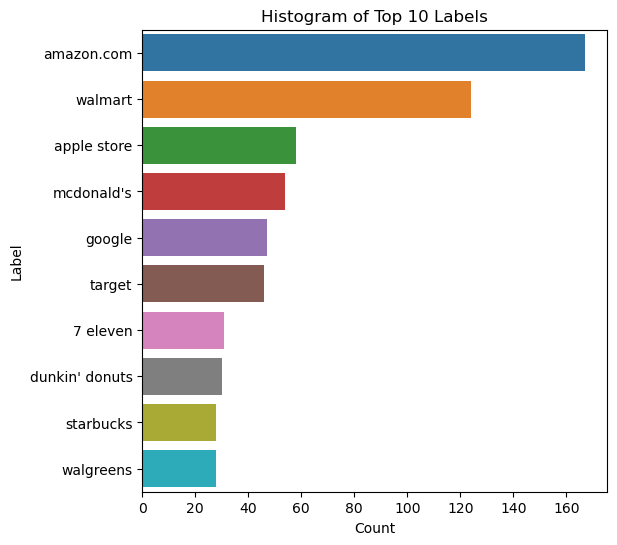

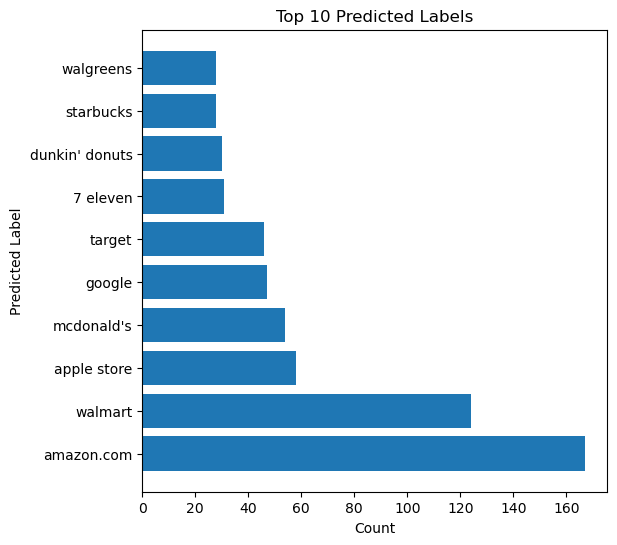

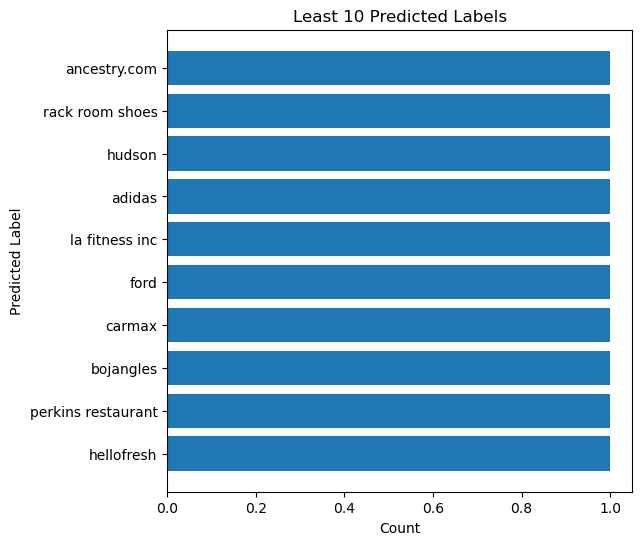

amazon.com: 167
walmart: 124
apple store: 58
mcdonald's: 54
google: 47
target: 46
7 eleven: 31
dunkin' donuts: 30
starbucks: 28
walgreens: 28


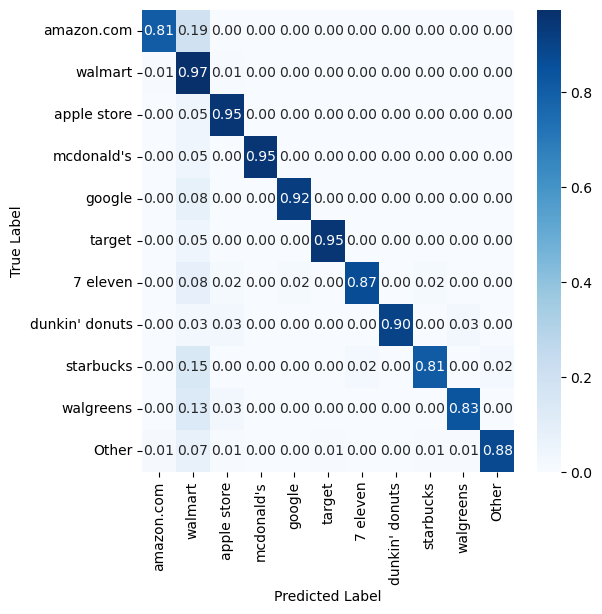



                                     precision    recall  f1-score   support

                     1-800-petmeds       0.00      0.00      0.00         0
                          7 eleven       0.68      0.81      0.74        26
                     99-cents-only       1.00      1.00      1.00         1
                     abc fine wine       0.00      0.00      0.00         0
         academy sports + outdoors       1.00      0.67      0.80         3
                      ace hardware       0.33      1.00      0.50         1
                      acme markets       1.00      0.67      0.80         3
                            adidas       0.00      0.00      0.00         0
                     adobe systems       1.00      1.00      1.00         2
                        albertsons       0.89      0.89      0.89         9
                              aldi       0.83      0.88      0.86        17
                          allstate       1.00      1.00      1.00         4
        

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('scaler', StandardScaler(with_mean=False)),
                ('classifier', SGDClassifier(alpha=0.001, random_state=42))])

In [69]:
from sklearn.linear_model import SGDClassifier

classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=1000, tol=1e-3)),
])

train(classifier, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

- K-Nearest Neighbors

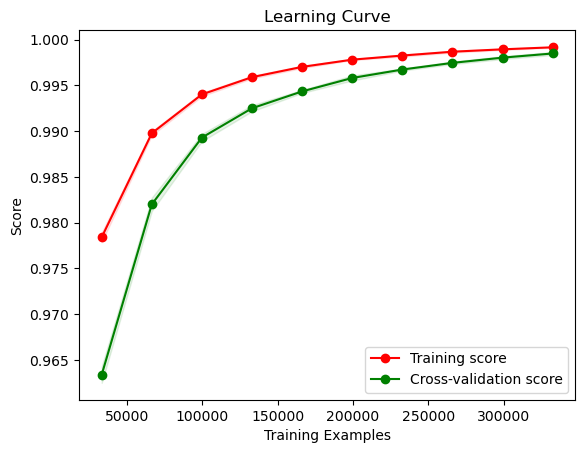

Accuracy : 0.714
Number of unique merchants in the test set:  361
Number of unique merchants in the predicted set:  299
Number of unique merchants in train set:  626

Number of unique "Transaction Details" rows in test set:  7598
Number of unique "Transaction Details" rows in train set:  1973

Total number of rows in the train set:  8000
Total number of rows in the test set 2000
Train accuracy: 0.97975
Test accuracy: 0.7135


Percentage of best precision 26.25

Percentage of best recall 30.0

Percentage of best f1score 17.75



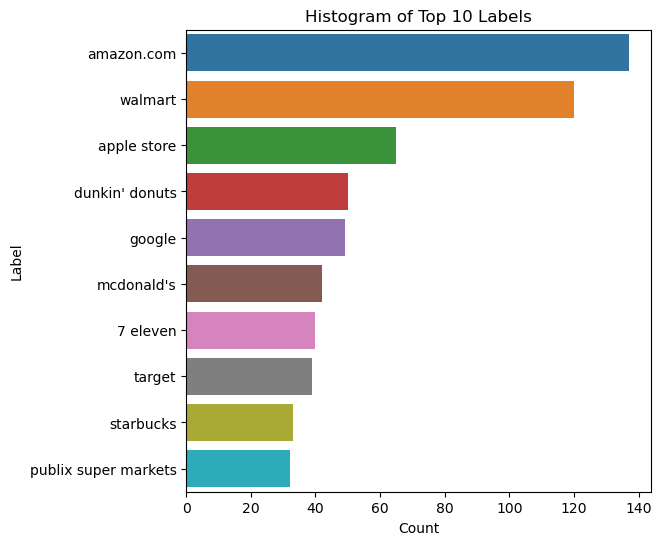

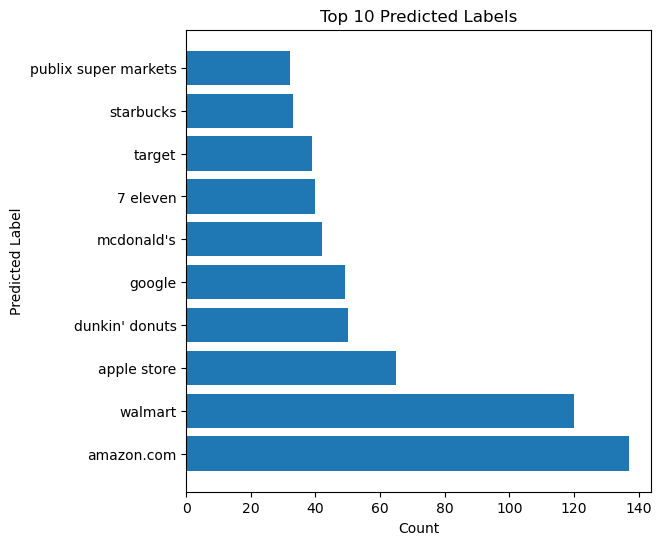

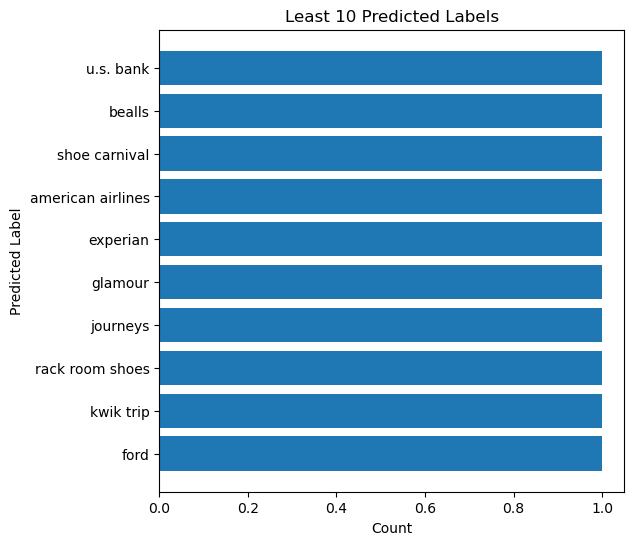

amazon.com: 137
walmart: 120
apple store: 65
dunkin' donuts: 50
google: 49
mcdonald's: 42
7 eleven: 40
target: 39
starbucks: 33
publix super markets: 32


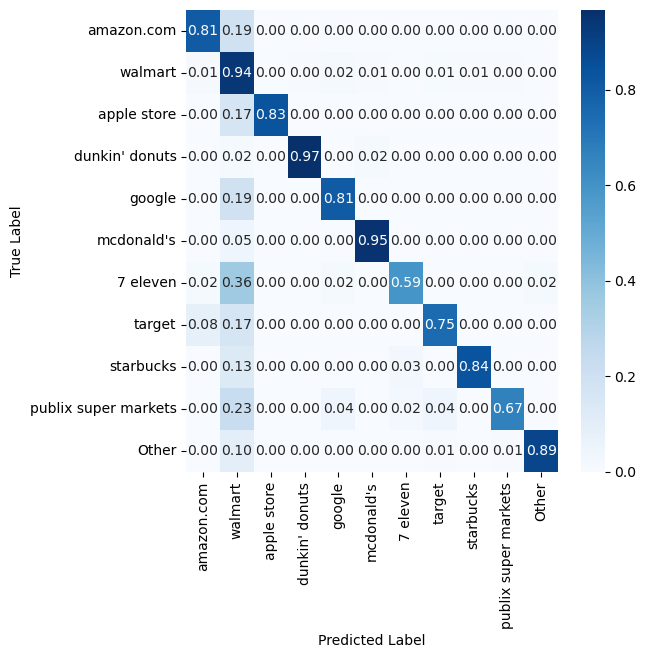



                                     precision    recall  f1-score   support

                          7 eleven       0.53      0.81      0.64        26
                     99-cents-only       1.00      1.00      1.00         1
         academy sports + outdoors       1.00      1.00      1.00         3
                      ace hardware       0.00      0.00      0.00         1
                      acme markets       0.75      1.00      0.86         3
                     adobe systems       1.00      1.00      1.00         2
                       aeropostale       0.00      0.00      0.00         0
                        albertsons       0.67      0.44      0.53         9
                              aldi       0.44      0.24      0.31        17
                          allstate       1.00      1.00      1.00         4
                             aloft       0.00      0.00      0.00         1
                      amazon prime       0.32      1.00      0.48         6
        

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [70]:
from sklearn.neighbors import KNeighborsClassifier

classifier4 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),
                        ('classifier', KNeighborsClassifier(n_neighbors=5))])

train(classifier4, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

KNN = cls_acc
Ktime = cls_time
print("\n\nKNN: ", KNN)
print("Time: ", Ktime)


# Payment Agents VS Merchant Names
- Selected known payment agents
- Checked number of total occurences per agents
- Checked total number of payment agents
- Checked number of transactions with known payment agents
- Defined a function compare payment agents with merchant names
- Created CHECK_MERCH_AGTS to check when agents and merchants are same
- Checked Totals for different situations

In [71]:
df_known_payment_agents = df_known_merchs.copy(deep=True)
# Known payment agent names
df_known_payment_agents = df_known_payment_agents.loc[df_known_payment_agents['AFS_PAYMENT_AGENTS'] != 'Unknow Payment Agent']
df_known_payment_agents

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
519563,Te8ad4e12296f36eab3998d4628542974,Withdrawal Debit Card %%%%% DD DOORDASH JACKINTHE 855-973-1040 CA Date 04/01/22 ***67912 5812,DOORDASH,JACK IN THE BOX,True
1403274,Tdce1faedc0b338f7960fe8ff7b957083,CHECK/DEBIT %%%%% VSA PUR PAYPAL UBER EATS 402-935-7733 CA (05/25/22 19:33:00),PAYPAL,UBEREATS,True
1288606,T7574cdcbc6d63cda971ed05fbe7534ac,DEBIT CARD DEBIT %%%%% auth #59962 10-20-2022 APPLE CASH 1INFINITELOOPCA *,APPLE CASH,APPLE STORE,True
1111727,Tc57a3d5987de39b8b84333a5d4778940,Card purchase %%%%% PAYPAL *PEACOCKTVLL 4899 (2022-06-27) 402-935-7733 NY *00,PAYPAL,NBC UNIVERSAL,False
910043,Tbdb3cb05d1ed35cbb118eeb4083df56d,Withdrawal PFCU Check Card %%%%% APPLE CASH 1INFINITELOOP CA Date 02/17/23 ***21968 4829 %% Card 30 #2677,APPLE CASH,APPLE STORE,True
...,...,...,...,...,...
1315058,T48b0c81bc14031a68c0d373ef0b7cdc3,Withdrawal DEBIT CARD %%%%% GOOGLE *Topup ***9322 g.co/walleth# CA Date 12/02/22 ***92400 4829,GOOGLE,GOOGLE,True
1032245,T06b23f7a53d632e2abbc2f100e685fb5,Withdrawal APPLE CASH %%%%% 1INFINITELOOP CA Date 01/23/23 ** 4829 %% Card 25 #7685 %% MCC 4829,APPLE CASH,APPLE STORE,True
238157,T5b2432018312322f83881567377d0161,Withdrawal Debit Roku for CBS %%%%% Inter 816-*7 DEUS,ROKU,CBS ALL ACCESS,True
1299969,T8ef66476a2393dd0a7295690353988e2,POS Transaction %%%%% The Roku Channel 816-*7 DEUS,ROKU,ROKU,True


In [72]:
print('Number of total occurences per payment agents:\n', (df_known_payment_agents.AFS_PAYMENT_AGENTS).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Number of total occurences per payment agents:
 GOOGLE             34.4%
PAYPAL             24.3%
DOORDASH           14.5%
APPLE CASH          6.8%
SQUARE              5.6%
GRUBHUB.COM         4.5%
ROKU                3.9%
OLO                 2.1%
INSTACART           1.8%
LEVELUP             0.9%
SQUARE CASH APP     0.6%
SEAMLESS.COM        0.3%
VENMO               0.3%
Name: AFS_PAYMENT_AGENTS, dtype: object


In [73]:
print('Total number of payment agents:\n',len(df_known_payment_agents.AFS_PAYMENT_AGENTS.unique()))

Total number of payment agents:
 13


In [74]:
print('Number of transactions with known payment agents:\n',len(df_known_payment_agents))

Number of transactions with known payment agents:
 337


In [75]:
# Function to compare payment agent names with merchant names
def compare_occurences(agent, merchant):
    agent = agent.split()
    merchant = merchant.split()
    # Conditions to check if words are in transaction strings
    if (merchant in agent or agent in merchant or
        (any(item in merchant for item in agent)) or
        (merchant[:3] in agent)):
        return True
    else:
        return False

In [76]:
# Checking if merchant names and payment agents are same
df_known_payment_agents['CHECK_MERCH_AGTS'] = df_known_payment_agents.apply(lambda x: compare_occurences(x.AFS_MECHANT_NAMES, x.AFS_PAYMENT_AGENTS), axis=1)
df_known_payment_agents.head()

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,CHECK_MERCH_AGTS
519563,Te8ad4e12296f36eab3998d4628542974,Withdrawal Debit Card %%%%% DD DOORDASH JACKINTHE 855-973-1040 CA Date 04/01/22 ***67912 5812,DOORDASH,JACK IN THE BOX,True,False
1403274,Tdce1faedc0b338f7960fe8ff7b957083,CHECK/DEBIT %%%%% VSA PUR PAYPAL UBER EATS 402-935-7733 CA (05/25/22 19:33:00),PAYPAL,UBEREATS,True,False
1288606,T7574cdcbc6d63cda971ed05fbe7534ac,DEBIT CARD DEBIT %%%%% auth #59962 10-20-2022 APPLE CASH 1INFINITELOOPCA *,APPLE CASH,APPLE STORE,True,True
1111727,Tc57a3d5987de39b8b84333a5d4778940,Card purchase %%%%% PAYPAL *PEACOCKTVLL 4899 (2022-06-27) 402-935-7733 NY *00,PAYPAL,NBC UNIVERSAL,False,False
910043,Tbdb3cb05d1ed35cbb118eeb4083df56d,Withdrawal PFCU Check Card %%%%% APPLE CASH 1INFINITELOOP CA Date 02/17/23 ***21968 4829 %% Card 30 #2677,APPLE CASH,APPLE STORE,True,True


- Checked how many times merchant names and payment agents are same
- Checked how many time merchant names and payment agents are different
- Checked total number of transactions with known agents

In [77]:
print('Same merchant names and payment agents:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==True]))

Same merchant names and payment agents:
 158


In [78]:
print('Merchant names and payment agents are diferent:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==False]))

Merchant names and payment agents are diferent:
 179


In [79]:
print('Number of rows with known Agents:\n',len(df_known_payment_agents))

Number of rows with known Agents:
 337


In [80]:
df_known_payment_agents

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,CHECK_MERCH_AGTS
519563,Te8ad4e12296f36eab3998d4628542974,Withdrawal Debit Card %%%%% DD DOORDASH JACKINTHE 855-973-1040 CA Date 04/01/22 ***67912 5812,DOORDASH,JACK IN THE BOX,True,False
1403274,Tdce1faedc0b338f7960fe8ff7b957083,CHECK/DEBIT %%%%% VSA PUR PAYPAL UBER EATS 402-935-7733 CA (05/25/22 19:33:00),PAYPAL,UBEREATS,True,False
1288606,T7574cdcbc6d63cda971ed05fbe7534ac,DEBIT CARD DEBIT %%%%% auth #59962 10-20-2022 APPLE CASH 1INFINITELOOPCA *,APPLE CASH,APPLE STORE,True,True
1111727,Tc57a3d5987de39b8b84333a5d4778940,Card purchase %%%%% PAYPAL *PEACOCKTVLL 4899 (2022-06-27) 402-935-7733 NY *00,PAYPAL,NBC UNIVERSAL,False,False
910043,Tbdb3cb05d1ed35cbb118eeb4083df56d,Withdrawal PFCU Check Card %%%%% APPLE CASH 1INFINITELOOP CA Date 02/17/23 ***21968 4829 %% Card 30 #2677,APPLE CASH,APPLE STORE,True,True
...,...,...,...,...,...,...
1315058,T48b0c81bc14031a68c0d373ef0b7cdc3,Withdrawal DEBIT CARD %%%%% GOOGLE *Topup ***9322 g.co/walleth# CA Date 12/02/22 ***92400 4829,GOOGLE,GOOGLE,True,True
1032245,T06b23f7a53d632e2abbc2f100e685fb5,Withdrawal APPLE CASH %%%%% 1INFINITELOOP CA Date 01/23/23 ** 4829 %% Card 25 #7685 %% MCC 4829,APPLE CASH,APPLE STORE,True,True
238157,T5b2432018312322f83881567377d0161,Withdrawal Debit Roku for CBS %%%%% Inter 816-*7 DEUS,ROKU,CBS ALL ACCESS,True,False
1299969,T8ef66476a2393dd0a7295690353988e2,POS Transaction %%%%% The Roku Channel 816-*7 DEUS,ROKU,ROKU,True,True
